# Module 3 - Project

#### _Name - Callum Ballard_

#### _Instructor - Jeff Herman_

#### _Course - Online Data Science (PT)_



In this project, we will consult for Northwind, a food/drink importer and exporter.

We will test a series of hypotheses to advise on business strategy, in a bid to improve the company's performance!

# 1) Import libraries

Bring in the required libraries and functions...

In [1]:
#For the initial data exploration
import numpy as np
import pandas as pd
import sqlite3
import datetime
from datetime import timedelta

#For data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import matplotlib.font_manager
import seaborn as sns

#For hypothesis testing
import scipy.stats as stats
import itertools

Set colours and chart styles for data visualisations...

In [2]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'

CB91_BlueL = '#D5F2FF'
CB91_GreenL = '#DAF8F5'
CB91_PinkL = '#FDECFC'
CB91_PurpleL = '#9D2EC5'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#E2C8F4'


#The following gradients will be used for heatmaps, etc
CB91_Grad_BP = ['#2CBDFE', '#2fb9fc', '#33b4fa', '#36b0f8', '#3aacf6', '#3da8f4', '#41a3f2',
                '#449ff0', '#489bee', '#4b97ec', '#4f92ea', '#528ee8', '#568ae6', '#5986e4',
                '#5c81e2', '#607de0', '#6379de', '#6775dc', '#6a70da', '#6e6cd8', '#7168d7',
                '#7564d5', '#785fd3', '#7c5bd1', '#7f57cf', '#8353cd', '#864ecb', '#894ac9',
                '#8d46c7', '#9042c5', '#943dc3', '#9739c1', '#9b35bf', '#9e31bd', '#a22cbb',
                '#a528b9', '#a924b7', '#ac20b5', '#b01bb3', '#b317b1']

CB91_Grad_BA = ['#2cbdfe', '#31bdf9', '#36bcf5', '#3bbcf0', '#41bcec', '#46bbe7', '#4bbbe3', '#50bbde',
                '#55bbd9', '#5abad5', '#60bad0', '#65bacc', '#6ab9c7', '#6fb9c3', '#74b9be', '#79b8ba',
                '#7eb8b5', '#84b8b0', '#89b7ac', '#8eb7a7', '#93b7a3', '#98b79e', '#9db69a', '#a3b695',
                '#a8b690', '#adb58c', '#b2b587', '#b7b583', '#bcb47e', '#c1b47a', '#c7b475', '#ccb371',
                '#d1b36c', '#d6b367', '#dbb363', '#e0b25e', '#e6b25a', '#ebb255', '#f0b151', '#f5b14c']

CB91_Grad_AP = ['#f5b14c', '#f3ae4f', '#f0aa52', '#eea755', '#eca458', '#eaa05c', '#e79d5f', '#e59962',
                '#e39665', '#e19368', '#de8f6b', '#dc8c6e', '#da8971', '#d88574', '#d58277', '#d37f7b',
                '#d17b7e', '#cf7881', '#cc7584', '#ca7187', '#c86e8a', '#c66a8d', '#c36790', '#c16493',
                '#bf6096', '#bd5d9a', '#ba5a9d', '#b856a0', '#b653a3', '#b450a6', '#b14ca9', '#af49ac',
                '#ad46af', '#ab42b2', '#a83fb5', '#a63bb9', '#a438bc', '#a235bf', '#9f31c2', '#9d2ec5']

CB91_Grad_GP = ['#47dbcd', '#4bd9ce', '#50d8cf', '#54d6d0', '#59d5d1', '#5dd3d2', '#61d2d3', '#66d0d4',
                '#6acfd5', '#6fcdd6', '#73ccd6', '#78cad7', '#7cc9d8', '#80c7d9', '#85c6da', '#89c4db',
                '#8ec3dc', '#92c1dd', '#96c0de', '#9bbedf', '#9fbde0', '#a4bbe1', '#a8bae2', '#acb8e3',
                '#b1b7e4', '#b5b5e5', '#bab4e6', '#beb2e7', '#c2b1e8', '#c7afe9', '#cbaee9', '#d0acea',
                '#d4abeb', '#d9a9ec', '#dda8ed', '#e1a6ee', '#e6a5ef', '#eaa3f0', '#efa2f1', '#f3a0f2']


#A list that we'll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink, CB91_Violet, CB91_BlueD,
              CB91_GreenD, CB91_Purple, CB91_BlueL, CB91_GreenL, CB91_AmberL,
              CB91_PinkL, CB91_VioletL, CB91_AmberD, CB91_PinkD, CB91_VioletD]

In [3]:
#Use seaborn to set all the default chart visual settings
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":19,"axes.labelsize":16}) 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

# 2) Initial exploratory analysis

We import and investigate each SQL table in turn, just to see what we're dealing with.

Firstly, create a function that uses the sqlite3 library, combined with pandas, to return an SQL query as a Pandas dataframe.

In [4]:
def sql(q,db = 'Northwind_small.sqlite'):
    
    """
    Takes q, a string, which represents an SQL query.
    
    Outputs a pandas dataframe representation of the SQL query results.
    
    Parameters
    ----------
    q : str, must be in SQL format.
    db: str, filepath of the SQL database
    
    """
    
    cnx = sqlite3.connect(db)
    return pd.read_sql(q, cnx)

### i) Product tables

In [5]:
#Join product category table
q1 = """SELECT *
   FROM Product
   JOIN Category
   ON Product.CategoryId = Category.Id"""

df_prod = sql(q1)

#Rename second ID column ahead of column dropping
df_prod.columns = ['Id', 'ProductName', 'SupplierId', 'CategoryId', 'QuantityPerUnit',
       'UnitPrice', 'UnitsInStock', 'UnitsOnOrder', 'ReorderLevel',
       'Discontinued', 'Id2', 'CategoryName', 'Description']

df_prod.drop(['Id2','Description'], inplace = True, axis = 1)

In [6]:
df_prod.head(5)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,CategoryName
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0,Beverages
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0,Beverages
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0,Condiments
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0,Condiments
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1,Condiments


We'll come back to this table later.

### ii) Supplier tables

In [7]:
qs = """SELECT *
   FROM Supplier"""

df_supp = sql(qs)

In [8]:
df_supp.head(10)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,Eastern Asia,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,British Isles,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,Northern Europe,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,South America,5442,Brazil,(11) 555 4640,None,None


### iii) Order tables

First look at the 'order details' table, which gives a line-item view of each order...

In [9]:
q2 = """SELECT *
    FROM 'OrderDetail'"""

df_orderdet = sql(q2)

#Work out the value of each line item by multiplying unit price and quanity.
#Multiply through by discount rate
df_orderdet['TotalPrice'] = round(df_orderdet['UnitPrice'] * df_orderdet['Quantity'] *
                                  (1-df_orderdet['Discount']),2)

In [10]:
df_orderdet

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,TotalPrice
0,10248/11,10248,11,14.00,12,0.00,168.00
1,10248/42,10248,42,9.80,10,0.00,98.00
2,10248/72,10248,72,34.80,5,0.00,174.00
3,10249/14,10249,14,18.60,9,0.00,167.40
4,10249/51,10249,51,42.40,40,0.00,1696.00
5,10250/41,10250,41,7.70,10,0.00,77.00
6,10250/51,10250,51,42.40,35,0.15,1261.40
7,10250/65,10250,65,16.80,15,0.15,214.20
8,10251/22,10251,22,16.80,6,0.05,95.76
9,10251/57,10251,57,15.60,15,0.05,222.30


What is the total value of all the discounts?

In [11]:
round(sum(df_orderdet['UnitPrice']*df_orderdet['Quantity']*df_orderdet['Discount']),2)

88665.55

In [12]:
#and as a share of total revenue
sum(df_orderdet['UnitPrice']*df_orderdet['Quantity']*df_orderdet['Discount']) / \
sum(df_orderdet['UnitPrice']*df_orderdet['Quantity'])

0.06546198691833022

Now look at the data on an order by order basis. We can add columns to this table, based on the order detail table.

In [13]:
q3 = """SELECT *
    FROM 'Order'"""

df_order = sql(q3)

#Note - we have some errors in the CustomerId column that we need to fix.
#These IDs should all be 5 characters - not 4.

id_fix_dict = {'DUMO':'DUMON','ANTO':'ANTON','QUEE':'QUEEN','OCEA':'OCEAN'}
def id_fix(x):
    if x in list(id_fix_dict.keys()):
        return id_fix_dict[x]
    else:
        return x
    
df_order['CustomerId'] = df_order['CustomerId'].map(lambda x: id_fix(x))


#We can bring in order value information from the order details table
#to see the total value of each order
df_order['OrderValue'] = df_order['Id'].map(
    lambda x: sum(df_orderdet.loc[df_orderdet['OrderId'] == x]['TotalPrice']))

#Then subtract the freight cost to work out the profit
df_order['OrderProfit'] = df_order['OrderValue'] - df_order['Freight']

#Work out how many items are in each order
df_order['ItemsInOrder'] = df_order['Id'].map(
    lambda x: sum(df_orderdet.loc[df_orderdet['OrderId'] == x]['Quantity']))

#Work out how many different unique products are included in each order
df_order['UniqueProducts'] = df_order['Id'].map(
    lambda x: len(df_orderdet.loc[df_orderdet['OrderId'] == x]))

#Convert order dates to datetime format, which will help with calculations later
df_order['OrderDate'] = pd.to_datetime(df_order['OrderDate'])
df_order['RequiredDate'] = pd.to_datetime(df_order['RequiredDate'])
df_order['ShippedDate'] = pd.to_datetime(df_order['ShippedDate'])

#Slim down the regions (e.g. Poland currently has its own region)
new_region_key = {'British Isles':'British Isles',
'Central America':'Latin America',
'Eastern Europe':'West Central Europe',
'Northern Europe':'Nordics',
'Scandinavia':'Nordics',
'South America':'Latin America',
'Southern Europe':'Southern Europe',
'Western Europe':'West Central Europe',
'North America':'North America'}

df_order['ShipRegion'] = df_order['ShipRegion'].map(lambda x: new_region_key[x])

#### Northwind has recorded over $1.26m of orders

In [14]:
print('Total Revenue', df_order['OrderValue'].sum())
print('First Order', min(df_order['OrderDate']))
print('Last Order', max(df_order['OrderDate']))

Total Revenue 1265793.02
First Order 2012-07-04 00:00:00
Last Order 2014-05-06 00:00:00


We can also see that the orders database covers 830 orders from August 2012, up to May 2014.

How does the number of orders, and the revenue from those orders, change over this time period?

In [15]:
#Create a 'monthly orders' dataframe, which aggregates performance on a month by month basis
monthly_orders = df_order.groupby(
    df_order['OrderDate'].dt.strftime('%Y/%m')).sum()[['OrderValue','OrderProfit']]

#Order count: the number of orders made in each month
monthly_orders['OrderCount'] = df_order.groupby(
    df_order['OrderDate'].dt.strftime('%Y/%m')).count()['Id']

#Average value of each order made in month
monthly_orders['AvgOrderValue'] = monthly_orders['OrderValue'] / monthly_orders['OrderCount']

#Unique customers making orders in month
monthly_orders['UniqueCust'] = df_order.groupby(
    df_order['OrderDate'].dt.strftime('%Y/%m')).nunique()['CustomerId']

#Number of orders made per customer in month
monthly_orders['OrdersPerCust'] = monthly_orders['OrderCount'] / monthly_orders['UniqueCust']

#Total money spent per customer in month
monthly_orders['ValuePerCust'] = monthly_orders['OrderValue'] / monthly_orders['UniqueCust']

#Unique number of cities shipped to in month
monthly_orders['UniqueCities'] = df_order.groupby(
    df_order['OrderDate'].dt.strftime('%Y/%m')).nunique()['ShipCity']

Let's look at this performance on a month by month basis, across a range of metrics...

Firstly, revenue by month...

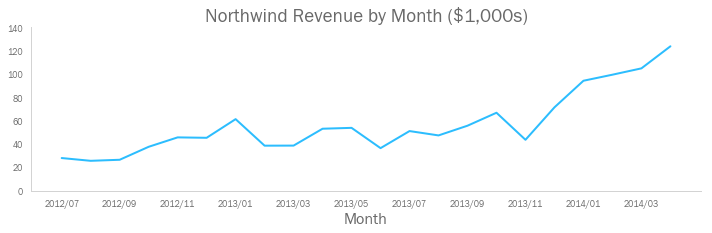

In [16]:
plt.figure(figsize=(12,3))
x = monthly_orders.index[:-1]
y = monthly_orders['OrderValue'][:-1]/1000
plt.plot(x,y,lw = 2,color = CB91_Blue, label = 'Revenue ($1,000s)');

plt.title('Northwind Revenue by Month ($1,000s)')
plt.xlabel('Month')
plt.ylim(0,140)

plt.xticks(ticks = [i*2 for i in range(11)]);

Unique customers ordering in month, including cities shipped to in month.

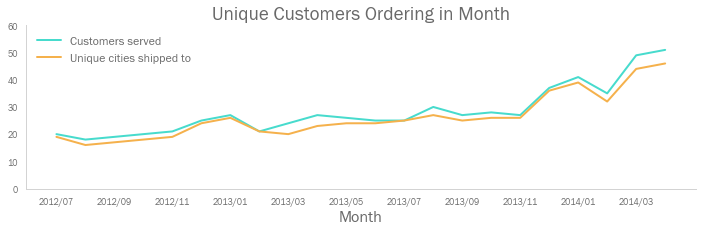

In [17]:
plt.figure(figsize=(12,3))
x = monthly_orders.index[:-1]
y1 = monthly_orders['UniqueCust'][:-1]
y2 = monthly_orders['UniqueCities'][:-1]
plt.plot(x,y1,lw = 2,color = CB91_Green, label = 'Customers served');
plt.plot(x,y2,lw = 2,color = CB91_Amber, label = 'Unique cities shipped to');

plt.title('Unique Customers Ordering in Month')
plt.xlabel('Month')
plt.ylim(0,60)
plt.legend(fontsize = 12, frameon = False)

plt.xticks(ticks = [i*2 for i in range(11)]);

Average revenue per customer that ordered in month.

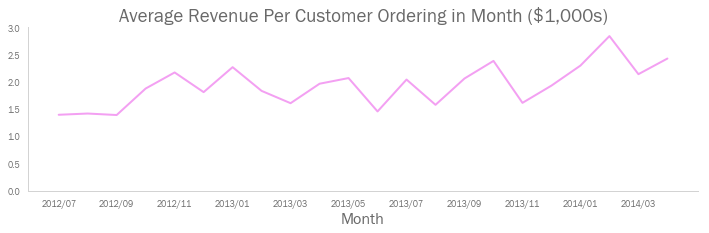

In [18]:
plt.figure(figsize=(12,3))
x = monthly_orders.index[:-1]
y = monthly_orders['ValuePerCust'][:-1]/1000
plt.plot(x,y,lw = 2,color = CB91_Pink);

plt.title('Average Revenue Per Customer Ordering in Month ($1,000s)')
plt.xlabel('Month')
plt.ylim(0,3)

plt.xticks(ticks = [i*2 for i in range(11)]);

Now total orders in month, vs. average order size. We see that order size is basically flat over time.

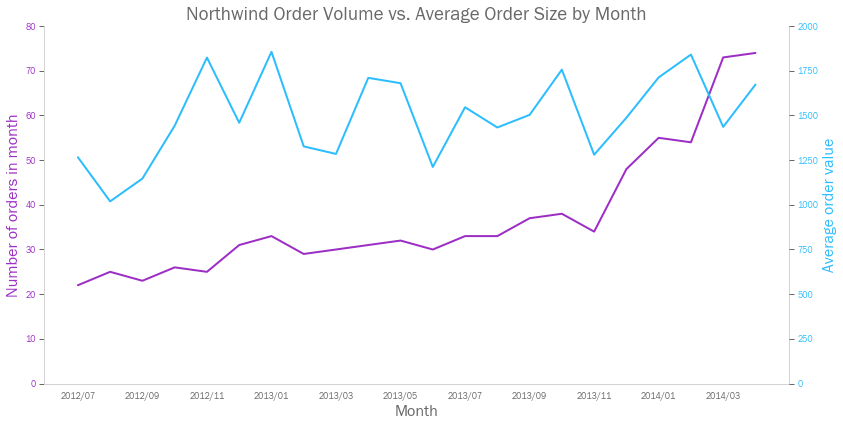

In [19]:
y1 = monthly_orders['OrderCount'][:-1]
y2 = monthly_orders['AvgOrderValue'][:-1]

fig, ax1 = plt.subplots(figsize=(12,6))

color = CB91_Purple
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of orders in month', color=color)
ax1.set_ylim(0,80)
ax1.plot(x, y1, lw = 2, color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = CB91_Blue
ax2.set_ylabel('Average order value', color=color)  # we already handled the x-label with ax1
ax2.set_ylim(0,2000)
ax2.plot(x, y2, lw = 2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

sns.despine(right=False)

plt.title('Northwind Order Volume vs. Average Order Size by Month')
plt.xticks(ticks = [i*2 for i in range(11)]);
plt.show()

We can also update the products table to get a view of which products are most popular, which are most discounted, and which products have made the most money.

In [20]:
df_prod['QuantSold'] = [df_orderdet.loc[df_orderdet['Id'].str.endswith(f"/{i}") == True]['Quantity'].sum()
                        for i in list(df_prod['Id'])]

df_prod['MeanDiscount'] = [df_orderdet.loc[df_orderdet['Id'].str.endswith(f"/{i}") == True]['Discount'].mean()
                        for i in list(df_prod['Id'])]

df_prod['TotalRevenue'] = [df_orderdet.loc[df_orderdet['Id'].str.endswith(f"/{i}") == True]['TotalPrice'].sum()
                        for i in list(df_prod['Id'])]

In [21]:
df_prod[['ProductName','CategoryName','UnitPrice','TotalRevenue','QuantSold']].sort_values(
    'TotalRevenue', ascending = False)

,ProductName,CategoryName,UnitPrice,TotalRevenue,QuantSold
37,Côte de Blaye,Beverages,263.50,141396.74,623
28,Thüringer Rostbratwurst,Meat/Poultry,123.79,80368.66,746
58,Raclette Courdavault,Dairy Products,55.00,71155.70,1496
61,Tarte au sucre,Confections,49.30,47234.96,1083
59,Camembert Pierrot,Dairy Products,34.00,46825.48,1577
55,Gnocchi di nonna Alice,Grains/Cereals,38.00,42593.06,1263
50,Manjimup Dried Apples,Produce,53.00,41819.65,886
16,Alice Mutton,Meat/Poultry,39.00,32698.38,978
17,Carnarvon Tigers,Seafood,62.50,29171.88,539
27,Rössle Sauerkraut,Produce,45.60,25696.64,640


Let's investigate the products sold in a scatter chart...

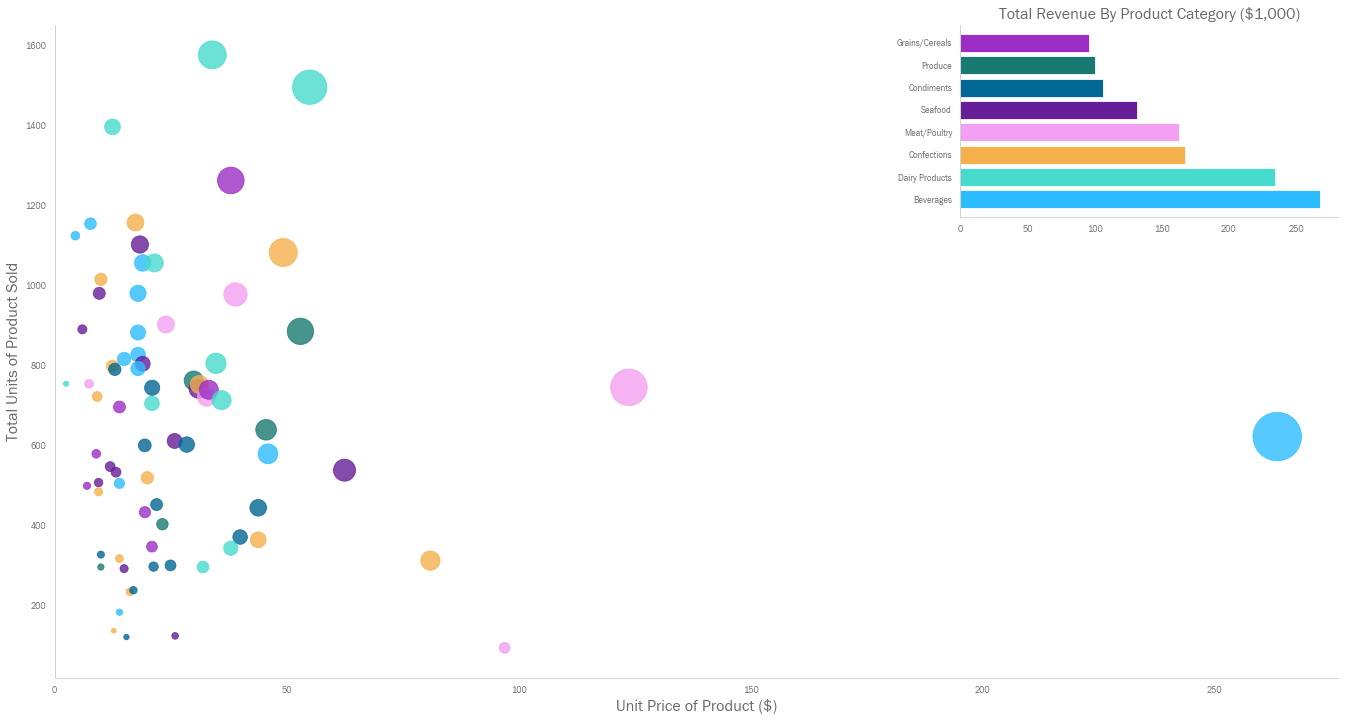

In [22]:
## Calculate the total revenue by product category
prod_rev = df_prod.groupby('CategoryName').sum().sort_values(
    'TotalRevenue',ascending = False)['TotalRevenue']

#Create a list of unique product categories
product_categories = list(prod_rev.index)

#Assign each of these to a color value
prod_color_dict = {product_categories[i]:color_list[i] for i in range(len(product_categories))}

#Create X,Y,Z, and colour values for the scatter
X = df_prod['UnitPrice']
Y = df_prod['QuantSold']
Z = df_prod['TotalRevenue']/60
C = [prod_color_dict[i] for i in df_prod['CategoryName']]

#Create subplots (we will super-impose the total revenue graph in the top-right corner)
fig, ax = plt.subplots(figsize=(23,12))
ax.set_xticks([])
ax.set_yticks([])

ax1 = fig.add_subplot(111)
ax1.scatter(X,Y,s=Z,c=C,alpha=0.8);
ax1.set_xlim(0,)
ax1.set_xlabel('Unit Price of Product ($)');
ax1.set_ylabel('Total Units of Product Sold');

ax2 = fig.add_subplot(333)
ax2.barh(list(prod_rev.index),prod_rev/1000,color=list(prod_color_dict.values()));
ax2.set_title('Total Revenue By Product Category ($1,000)', fontsize=16);

### iv) Customer table

In [23]:
q4 = """SELECT *
    FROM Customer"""

df_cust = sql(q4)

In [24]:
#Reflect the previous change in regions
df_cust['Region'] = df_cust['Region'].map(lambda x: new_region_key[x])

df_cust

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,West Central Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Latin America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Latin America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Nordics,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
5,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,West Central Europe,68306,Germany,0621-08460,0621-08924
6,BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,West Central Europe,67000,France,88.60.15.31,88.60.15.32
7,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99
8,BONAP,Bon app,Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,West Central Europe,13008,France,91.24.45.40,91.24.45.41
9,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


How many orders have each company placed?

In [25]:
df_cust['Orders'] = df_cust['Id'].map(
    lambda x: len(df_order.loc[df_order['CustomerId'] == x]['OrderDate']))

When was each customer onboarded (i.e. when did they make their first order?) Have any become inactive?

In [26]:
#Write a quick function to see if customers have no orders.
#This will help the lambda functions in the next block.

def cust_has_orders(CustId):
    if int(df_cust.loc[df_cust['Id'] == CustId]['Orders']) > 0:
        return True
    else:
        return False

In [27]:
df_cust['FirstOrder'] = df_cust['Id'].map(
    lambda x: df_order.loc[df_order['CustomerId'] == x]['OrderDate'].iloc[0]
    if cust_has_orders(x) else None)

df_cust['LastOrder'] = df_cust['Id'].map(
    lambda x: df_order.loc[df_order['CustomerId'] == x]['OrderDate'].iloc[-1]
    if cust_has_orders(x) else None)

last_day = df_order['OrderDate'].iloc[-1]
df_cust['DaysSinceOrder'] = last_day - df_cust['LastOrder']

In [28]:
df_cust

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,Orders,FirstOrder,LastOrder,DaysSinceOrder
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,West Central Europe,12209,Germany,030-0074321,030-0076545,6,2013-08-25,2014-04-09,27 days
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Latin America,05021,Mexico,(5) 555-4729,(5) 555-3745,4,2012-09-18,2014-03-04,63 days
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Latin America,05023,Mexico,(5) 555-3932,None,7,2012-11-27,2014-01-28,98 days
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750,13,2012-11-15,2014-04-10,26 days
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Nordics,S-958 22,Sweden,0921-12 34 65,0921-12 34 67,18,2012-08-12,2014-03-04,63 days
5,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,West Central Europe,68306,Germany,0621-08460,0621-08924,7,2013-04-09,2014-04-29,7 days
6,BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,West Central Europe,67000,France,88.60.15.31,88.60.15.32,11,2012-07-25,2014-01-12,114 days
7,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99,3,2012-10-10,2014-03-24,43 days
8,BONAP,Bon app,Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,West Central Europe,13008,France,91.24.45.40,91.24.45.41,17,2012-10-16,2014-05-06,0 days
9,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745,14,2012-12-20,2014-04-24,12 days


What can we say about the 'activity' of customers. i.e. are there many customers that have not ordered from Northwind recently?

In [29]:
#This line removes NAs and gets days as an integer value from the deltatime object
days_since_list = [i.total_seconds()/(3600*24)
                   for i in list(df_cust['DaysSinceOrder'].dropna())]

days_since_list.sort()

In [30]:
#We will create a sort of cumulative/decay chart here
#Create a list of all the unique 'dayssinceorder' values
#and calculate what share of the customers have made an order in that many days

x = []
for i in range(len(days_since_list)):
    if days_since_list[:i].count(days_since_list[i]) == 0:
        x.append(days_since_list[i])

y = [100 * sum(list(map(lambda x: x <= i,days_since_list)))/len(days_since_list) for i in x]

How many customers have made an order in the last 30 days? How about the last 60? Or 90?

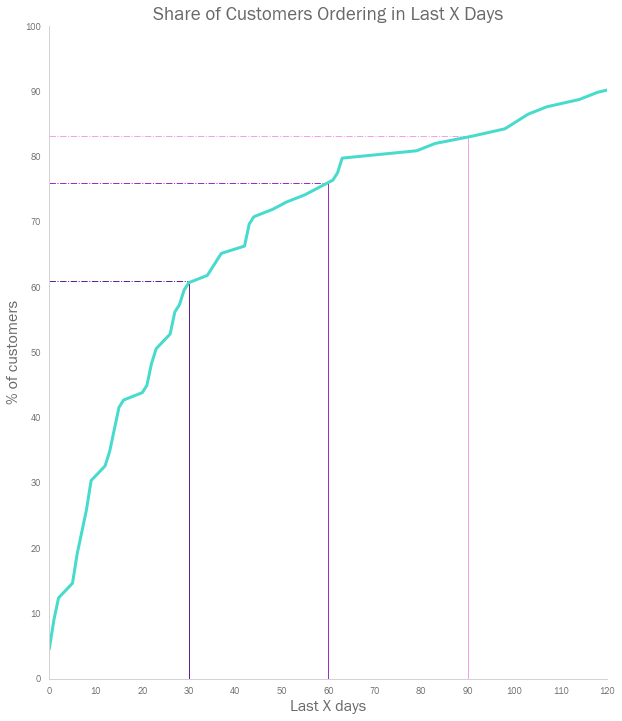

In [31]:
#We will create a sort of cumulative/decay chart here
#Create a list of all the unique 'dayssinceorder' values
#and calculate what share of the customers have made an order in that many days

x = []
for i in range(len(days_since_list)):
    if days_since_list[:i].count(days_since_list[i]) == 0:
        x.append(days_since_list[i])

y = [100 * sum(list(map(lambda x: x <= i,days_since_list)))/len(days_since_list) for i in x]


plt.figure(figsize=(10,12))

plt.plot([30,30],[0,61],color = CB91_Violet, lw = 1)
plt.plot([0,30],[61,61],color = CB91_Violet, lw = 1, ls = '-.')

plt.plot([60,60],[0,76],color = CB91_Purple, lw = 1)
plt.plot([0,60],[76,76],color = CB91_Purple, lw = 1, ls = '-.')

plt.plot([90,90],[0,83.2],color = CB91_Pink, lw = 1)
plt.plot([0,90],[83.2,83.2],color = CB91_Pink, lw = 1, ls = '-.')

plt.plot(x, y, lw = 3, color = CB91_Green);

plt.title('Share of Customers Ordering in Last X Days')
plt.xlabel('Last X days')
plt.ylabel('% of customers')
plt.ylim(0,100);
plt.xlim(0,120);

plt.xticks(ticks = [i*10 for i in range(13)]);
plt.yticks(ticks = [i*10 for i in range(11)]);

Can we visualise the lifespan of customer activity?

/Users/Callum/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


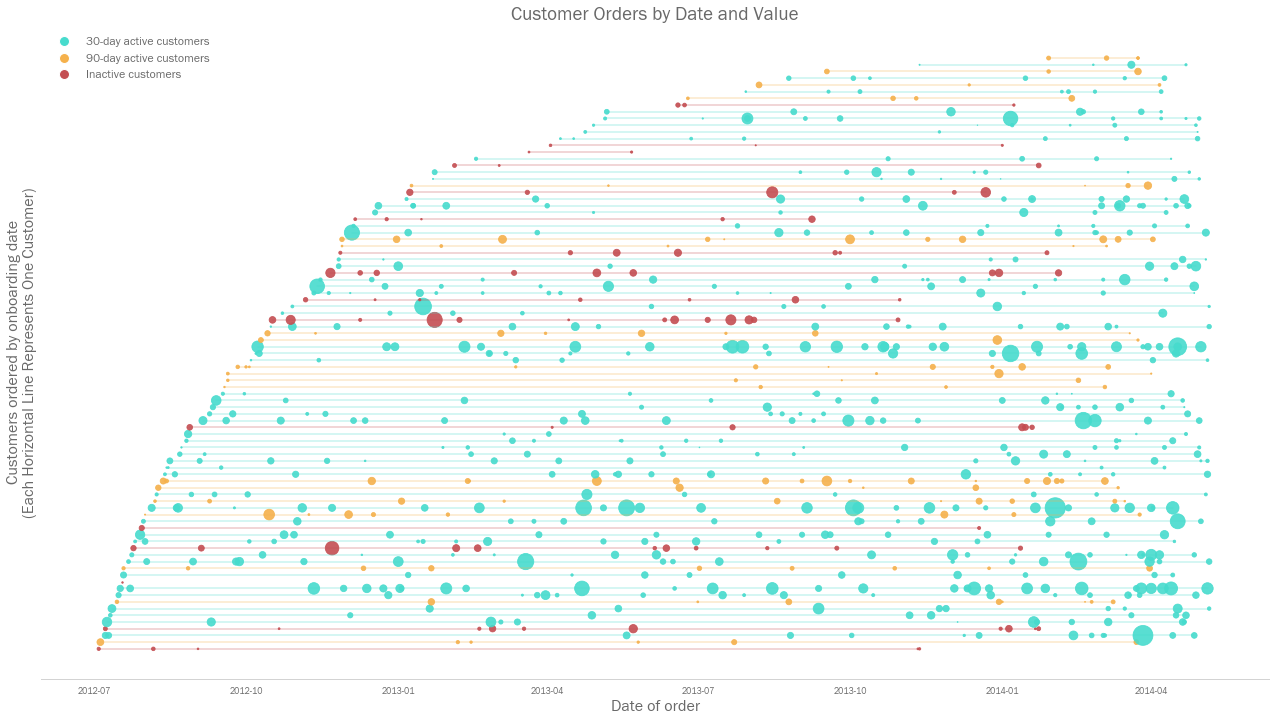

In [32]:
plt.figure(figsize=(22,12))

active_cust = df_cust.dropna(subset=['FirstOrder', 'LastOrder']).sort_values('FirstOrder')

y = 1
for i in list(active_cust['Id']):
    
    sub_df = df_order.loc[df_order['CustomerId'] == i]
    
    X = list(sub_df['OrderDate'])
    Y = [y for x in X]
    Z = list(sub_df['OrderValue']/40)
    
    days_since = active_cust.loc[active_cust['Id'] == i]['DaysSinceOrder'].iloc[0]
    
    if days_since < timedelta(days=30):
        color = CB91_Green
    elif days_since < timedelta(days=90):
        color = CB91_Amber
    else:
        color = 'r'

    plt.plot([active_cust.loc[active_cust['Id'] == i]['FirstOrder'].iloc[0],
              active_cust.loc[active_cust['Id'] == i]['LastOrder'].iloc[0]],
             [y,y], c=color, lw=1.5, alpha=0.3)
        
    plt.scatter(X,Y,s=Z,c=color,alpha=0.9)
    
    y += 1

    
plt.yticks([])
sns.despine(left=True)

plt.title('Customer Orders by Date and Value')
plt.xlabel('Date of order')
plt.ylabel('Customers ordered by onboarding date\n(Each Horizontal Line Represents One Customer)')
    
    
custom_lines = [Line2D([0], [0], marker='o', c='w', markerfacecolor=CB91_Green, markersize=10),
                Line2D([0], [0], marker='o', c='w', markerfacecolor=CB91_Amber, markersize=10),
                Line2D([0], [0], marker='o', c='w', markerfacecolor='r', markersize=10)]
    
plt.legend(custom_lines,
           ['30-day active customers', '90-day active customers', 'Inactive customers'],
           loc = 2,
           fontsize = 12,
           frameon=False);

#### Calculate profitability of each customer

First work out the total and average values of each customer's orders, then work out the equivalent values for the number of items in their orders.

In [33]:
#Total and average spend by customers
df_cust['TotalValue'] = df_cust['Id'].map(
    lambda x: sum(df_order.loc[df_order['CustomerId'] == x]['OrderValue']))

df_cust['AvgOrder'] = round(df_cust['TotalValue'] / df_cust['Orders'],2)


#Total items bought by cusotmers
df_cust['TotalItems'] = df_cust['Id'].map(
    lambda x: sum(df_order.loc[df_order['CustomerId'] == x]['ItemsInOrder']))

df_cust['AvgItems'] = round(df_cust['TotalItems'] / df_cust['Orders'],2)

df_cust['AvgUniqueItems'] = df_cust['Id'].map(
    lambda x: round(np.mean(df_order.loc[df_order['CustomerId'] == x]['UniqueProducts']),3))

active_cust = df_cust.dropna(subset=['FirstOrder', 'LastOrder']).sort_values('FirstOrder')

### v) Employee tables

In [34]:
q5 = """SELECT *
    FROM Employee"""

df_emp = sql(q5)

In [35]:
df_emp

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


### vi) Shipper table

In [36]:
q6 = """SELECT *
    FROM Shipper"""

df_ship = sql(q6)

In [37]:
df_ship

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


# 3) Conduct Hypotheses

During the hypothesis testing, we will use both T-Tests, and Monte Carlo Simulations.

In preparation for this, we create some functions that are not otherwise available.

In [38]:
def subtract_array(full_array, sub_array):
    
    '''
    Take one numpy array (full array),
    gt5t§and "remove" another (sub_array) from it.
    
    e.g. subtract_array([1,1,3,5,5,6,7], [1,5,6])
         returns [1,3,5,7]
         
    sub_array must be a sub-set of the full_array
    
    '''
    
    #For each element, i, in the subarray...
    for i in sub_array:
        
        #Delete the first instance of i from the full array (but leave other instances)
        full_array = np.delete(full_array, np.where(full_array == i)[0][0])
        
    return full_array

In [39]:
def monte_carlo(A, B, n = 10000, A_x_than_B = 'greater'):
    
    '''
    Run a monte carlo simulation on two samples, and return a p_value
    that the mean of population A is bigger than population B
    
    INPUTS:
        A (numpy array or list):
        The first sample (the one we expect to be larger)

        B (numpy array or list):
        The second sample (the one we expect to be smaller)

        n (integer):
        The number of simulations that should be run
        
        A_x_than_B (string):
        -'greater' if we are testing that A is greater than B
        -'less' if we are testing that A is less than B
        
    '''
    
    #Test to see if samples are given as lists, and convert to numpy arrays if so:
    if type(A) == list:
        A = np.array(A)
    if type(B) == list:
        B = np.array(B)
        
    #Calculate the true mean difference for comparison later
    mean_diff = np.mean(A) - np.mean(B)
    
    #Combine the two samples into a single array
    data = np.concatenate((A, B))
    
    len_A = len(A)
    
    #Initiate a list of samples with same length as sample A
    new_As = []
    
    #Take n random samples equal to length of sample A from the combined array
    for i in range(n):
        new_As.append(np.random.choice(data, len_A, replace=False))
    
    #Given our list of new_A samples, create an equivalent list of new_Bs.
    #These are the 'complimentary sets' of elements, relative to the new_As.
    new_Bs = [subtract_array(data, i) for i in new_As]
    
    #Create a list of these new combinations
    new_combs = [(new_As[i], new_Bs[i]) for i in range(n)]
    
    #Calculate the differences between their means
    comb_diffs = np.array([np.mean(i[0]) - np.mean(i[1]) for i in new_combs])
    
    #Work out the share of the comb_diffs that are larger or smaller than the original mean_diff
    if A_x_than_B == 'greater':
        return sum(comb_diffs > mean_diff) / n
    if A_x_than_B == 'less':
        return sum(comb_diffs < mean_diff) / n

In [40]:
def reject_null(p_value,alpha = 0.05):
    
    '''
    Compares a p_value to a given alpha (default = 0.05),
    and tells us whether to reject Null Hypothesis or not
        
    '''
    
    if p_value < alpha:
        return 'Reject Null Hypothesis'
    else:
        return 'Do not reject Null Hypothesis'

## Hypothesis 1

This test will look at the customer characteristics by region, to try and inform us where Northwind should focus any further expansion efforts.

In particular, we will look at the average revenue generated by clients in each region in the last 2 months of the dataset's time period, and see if any regions in particular generate an average revenue that is statistically significant one way or the other.

Firstly, let's create an area graph over time, to see how Northwind's expansion has gone so far. We need some formulae to help with that in the first instance.

In [41]:
two_months = 2 * 365/12

def recent_cust(up_to,in_last = two_months):
    '''
    Returns a list of unique customers that made orders in the last x days,
    up to and including a pre-determined date.
    
    Parameters
    * up_to (datetime object): The last date (up to and including) to consider.
    * in_last (float): The number of days back from the up_to date to consider.
        
    '''
    
    #Calculate the minimum date from the parameter inputs
    min_date = up_to - timedelta(days=in_last)
    
    #Create a df of orders falling in this time range
    df = df_order.loc[(df_order['OrderDate'] <= up_to)
                      & (df_order['OrderDate'] > min_date)]
    
    #Return a list of unique customer IDs making orders in this range
    return list(df['CustomerId'].unique())



def recent_cust_regions(up_to,in_last = two_months,
                        regions = ['British Isles','West Central Europe',
                                   'Nordics','Southern Europe',
                                   'North America','Latin America']):
    '''
    Parameters
    * up_to (datetime object): The last date (up to and including) to consider.
    * in_last (float): The number of days back from the up_to date to consider.
    * regions (list): The regions that we should consider

    Returns a dictionary, key values are regions, and the values are the
    number of customers in that region that made orders in the last x days,
    up to and including a pre-determined date.
    
    '''
    
    #Create a list of customers ordering in time frame
    cust = recent_cust(up_to,in_last = in_last)
    
    #Create a groupby df counting customers by region
    region_count = df_cust.loc[df_cust['Id'].isin(cust)].groupby('Region').count()['Id']
    
    #Create and return a dictionary version of the region_count df
    return {i:(region_count[i] if i in list(region_count.index) else 0) for i in regions}



def region_cust_by_date(dates,in_last = two_months,
                        regions = ['British Isles','West Central Europe',
                                   'Nordics','Southern Europe',
                                   'North America','Latin America']):
    
    '''
    Returns a list of dictionaries, which align with the list of dates passed.
    
    Key values are regions, and the values are the
    number of customers in that region that made orders in the last x days,
    up to and including a pre-determined date.
    
    Parameters
    * dates (list of datetime objects): A list of dates to consider.
    * in_last (float): The number of days back from the up_to date to consider.
    * regions (list): The regions that we should consider
        
    '''
    
    dictionary_list = []
    
    for date in dates:
        dictionary_list.append(recent_cust_regions(up_to = date, in_last = in_last, regions = regions))
        
    return dictionary_list

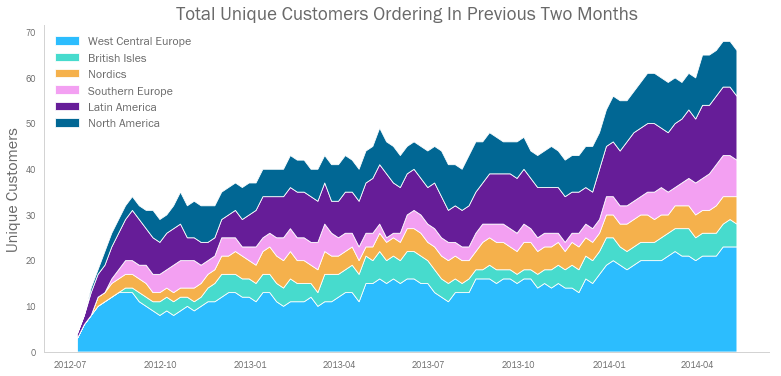

In [42]:
date_lists = pd.date_range(min(df_order['OrderDate']),
                           max(df_order['OrderDate']+timedelta(days=7)), freq='W')

regions = ['West Central Europe','British Isles','Nordics',
           'Southern Europe','Latin America','North America']

expansion_list = region_cust_by_date(dates = date_lists, in_last = 2*365/12, regions = regions)

Y = []
for region in regions:
    Y.append([i[region] for i in expansion_list])

X = date_lists
Y = np.vstack(Y)


plt.figure(figsize=(13,6))

plt.stackplot(X,Y,labels = regions);
plt.title('Total Unique Customers Ordering In Previous Two Months')
plt.ylabel('Unique Customers')

plt.legend(loc = 2, fontsize = 12, frameon = False);

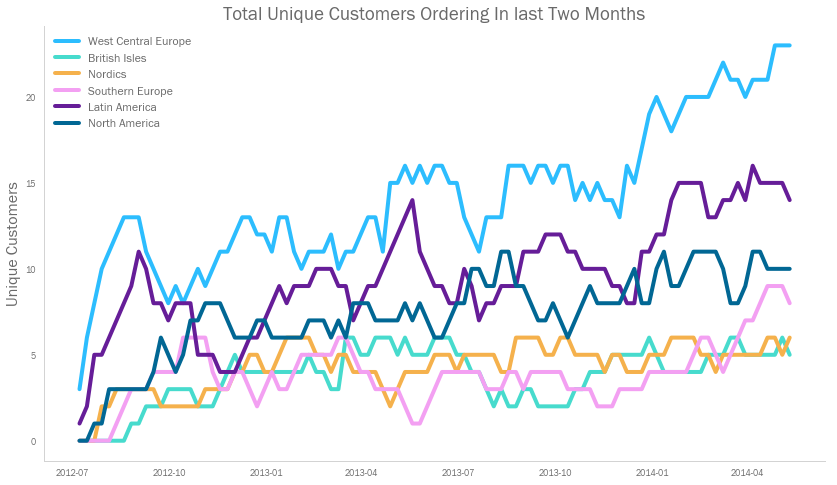

In [43]:
date_lists = pd.date_range(min(df_order['OrderDate']),
                           max(df_order['OrderDate']+timedelta(days=8)), freq='W')

regions = ['West Central Europe','British Isles','Nordics',
           'Southern Europe','Latin America','North America']

expansion_list = region_cust_by_date(dates = date_lists, regions = regions, in_last = 2*365/12)


X = date_lists

plt.figure(figsize=(14,8))
color_count = 0

for region in regions:
    Y = [i[region] for i in expansion_list]
    plt.plot(X,Y,lw = 4,color = color_list[color_count],label = region)
    color_count += 1

plt.title('Total Unique Customers Ordering In last Two Months')
plt.ylabel('Unique Customers')

plt.legend(loc = 2, fontsize = 12, frameon = False);

So we can see recent expansion has been driven by West/Central Europe, Southern Europe, and Latin America.

Let's look at orders in the last month, and see which regions had the most valuable customers.

In [44]:
#Create a df of orders made in the last 2 months
orders_last_2months = df_order.loc[max(df_order['OrderDate'])
                                   - df_order['OrderDate'] < timedelta(days = 2*365/12)]

#For orders in the last 2 months, create a sum for each customer,
#then take an average of each customer's sum (average by region)
orders_last_2months.groupby(['ShipRegion','CustomerId']).sum().groupby('ShipRegion').mean()

,Id,EmployeeId,ShipVia,Freight,OrderValue,OrderProfit,ItemsInOrder,UniqueProducts
ShipRegion,,,,,,,,
British Isles,26420.200000,12.200000,4.600000,189.914000,4014.354000,3824.440000,156.200000,5.800000
Latin America,22017.666667,8.866667,3.666667,101.628667,2968.210667,2866.582000,92.000000,4.600000
Nordics,22002.500000,9.500000,4.333333,104.041667,2514.710000,2410.668333,98.333333,4.000000
North America,31919.700000,10.700000,6.600000,391.556000,5844.169000,5452.613000,219.600000,9.600000
Southern Europe,19242.000000,8.000000,3.250000,69.160000,1246.293750,1177.133750,49.375000,3.500000
West Central Europe,22490.347826,9.173913,4.043478,174.340870,3540.708261,3366.367391,148.086957,5.521739


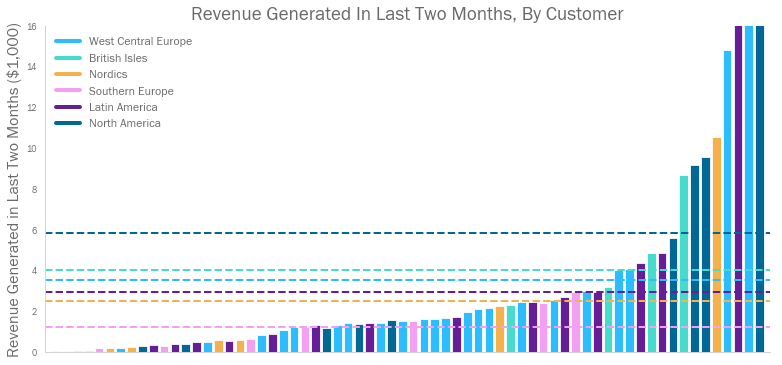

In [45]:
Y = orders_last_2months.groupby(
    'CustomerId').sum().sort_values('OrderValue')['OrderProfit']/1000

X = Y.index

corresp_region = [df_cust.loc[df_cust['Id']==i]['Region'] for i in X]
region_colors = {regions[i]:color_list[i] for i in range(6)}
C = [region_colors[i.values[0]] for i in corresp_region]

plt.figure(figsize=(13,6))
plt.bar(X,Y,color = C);


for region in regions:
    line = orders_last_2months.groupby(
        ['ShipRegion','CustomerId']).sum().groupby('ShipRegion').mean().loc[region,'OrderValue']/1000
    
    plt.hlines(y=line, xmin=0, xmax=len(X), color = region_colors[region], lw=2, linestyles='dashed')

plt.yticks(np.arange(0,round(max(Y),1)+2,step = 2))
plt.ylim(0,16)

plt.xticks([]);
plt.xlim(0,len(X))

plt.title('Revenue Generated In Last Two Months, By Customer')
plt.ylabel('Revenue Generated in Last Two Months ($1,000)')

custom_lines = [Line2D([0], [0], color=i, lw = 4) for i in list(region_colors.values())]
    
plt.legend(custom_lines,
           list(region_colors.keys()),
           loc = 2,
           fontsize = 12,
           frameon=False);

Create a function that takes a region, a dataframe, and a KPI, and returns two samples that we can perform Monte Carlo simulations on.

In [46]:
def region_samples(region,kpi='OrderValue',df=df_cust):
    
    '''
    Takes region, a dataframe, and KPI.
    Outputs two samples:
    
    sample 1:
        The KPI datapoints for the customers in the given region
        
    sample 2:
        The equivalent sample for the other regions
    '''
    
    region_customers = list(df_cust[df_cust['Region'] == region]['Id'])
    
    region_sample = np.array(df.loc[df['CustomerId'].isin(region_customers)][kpi])
    
    compliment_sample = np.array(df.loc[~df['CustomerId'].isin(region_customers)][kpi])
    
    return region_sample, compliment_sample

In [47]:
#Create a dataframe, which lists all the companies that have made orders in the
#last two months and the total values of orders made in the last two months

order_values2months = orders_last_2months.groupby('CustomerId').sum().reset_index()[['CustomerId','OrderValue']]

We run Monte Carlo simulations on each region in turn, with increasing numbers of simulations to see what the p-values tend to in each case.

In [48]:
mc_runs = [10,20,30,40,50,100,200,300,400,500,1000,2000,3000,4000,5000,
           10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,
           110000,120000,130000,140000,150000,200000]

# region_value_dict = {'Simulations':mc_runs}
# for region in regions:
#     A, B = region_samples(region = region,df = order_values2months)
#     mc_list = []
#     for i in mc_runs:
#         mc = monte_carlo(A,B,n=i)
#         mc_list.append(mc)
#     region_value_dict[region] = mc_list
    
# Hypothesis1 = pd.DataFrame(region_value_dict).set_index('Simulations')

# Hypothesis1.to_csv('Hypothesis1pvals.csv')

Hypothesis1 = pd.read_csv('Hypothesis1pvals.csv')

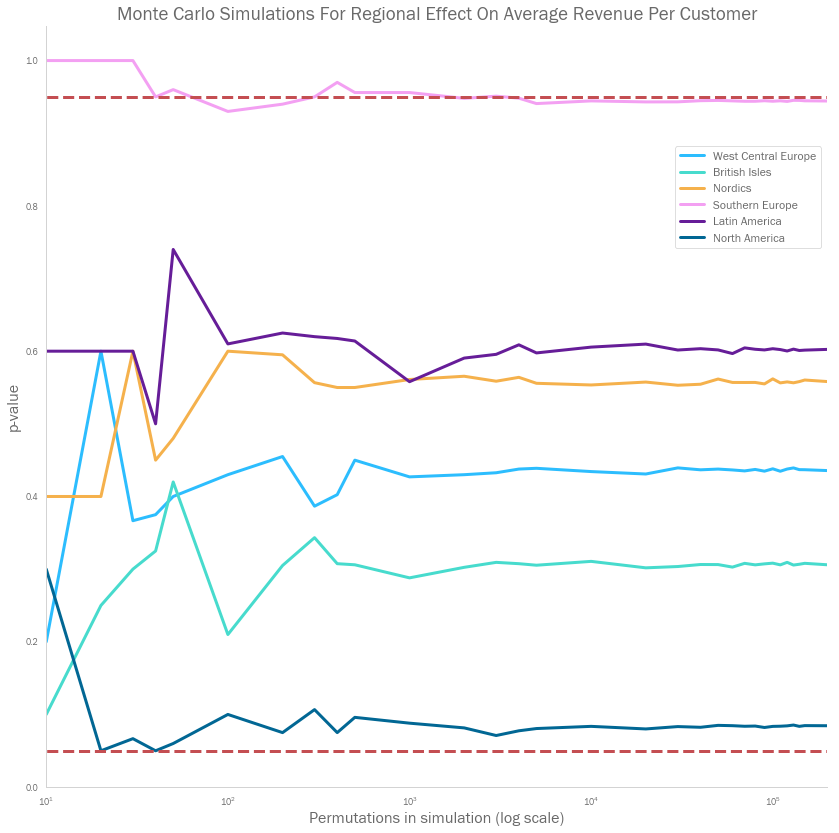

In [49]:
plt.figure(figsize = (14,14))

X = mc_runs

for region in list(Hypothesis1.columns[1:]):
    Y = Hypothesis1[region]
    plt.plot(X,Y,lw=3, color = region_colors[region]);


plt.plot([0,200000],[0.05,0.05],color = 'r', ls = '--', lw = 3)
plt.plot([0,200000],[0.95,0.95],color = 'r', ls = '--', lw = 3)


plt.xscale('log')
plt.xlim(10,200000)
plt.ylim(0,);

plt.title('Monte Carlo Simulations For Regional Effect On Average Revenue Per Customer');
plt.xlabel('Permutations in simulation (log scale)');
plt.ylabel('p-value');


plt.legend(fontsize = 12, bbox_to_anchor=(1, 0.85));

We see that no regions are higher than 0.95 or lower than 0.05. Thus we can not say that the difference between their averages is not statistically significant.


## Hypothesis 2

This test will look at the effect of discounting.

We introduce categories to the order detail table, allowing us to group by product category and discount bands.

In [50]:
ProductCategory = [df_prod.loc[df_prod['Id'] == i]['CategoryName'].iloc[0] for i in df_orderdet['ProductId']]
df_orderdet['ProductCategory'] = ProductCategory

disc_cat_key = {0.0:'00%', 0.15:'15%', 0.05:'01-05%',
                0.2:'20%', 0.25:'25%', 0.1:'06-10%',
                0.02:'01-05%', 0.03:'01-05%', 0.04:'01-05%',
                0.06:'06-10%', 0.01:'01-05%'}
df_orderdet['DiscountCat'] = df_orderdet['Discount'].map(lambda x: disc_cat_key[x])

Count the number of times each type of discount was offered, just to see if we have a reasonably even split.

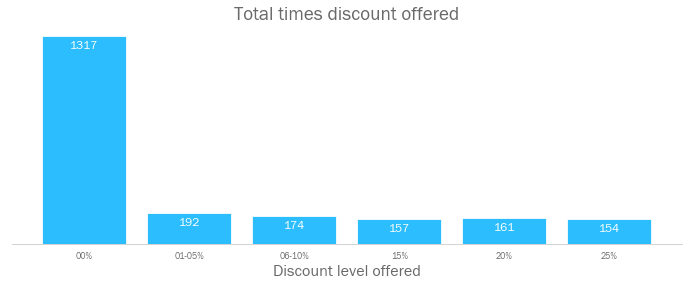

In [51]:
x = list(df_orderdet.groupby('DiscountCat').count().index)
y = list(df_orderdet.groupby('DiscountCat').count()['Id'])

plt.figure(figsize=(12,4));
plt.bar(x,y);
plt.title('Total times discount offered');
plt.xlabel('Discount level offered');
plt.yticks([])
sns.despine(left=True)

for i, v in enumerate(y):
    plt.text(i, v-30, v, fontsize = 12, va = 'top', ha = 'center', color = 'w')

So discounts are offered less than half the time, and the amount of discount that is offered is split quite evenly across the different orders (when a discount is made).

What is the average order size depending on discount level? Does this vary across product categories?

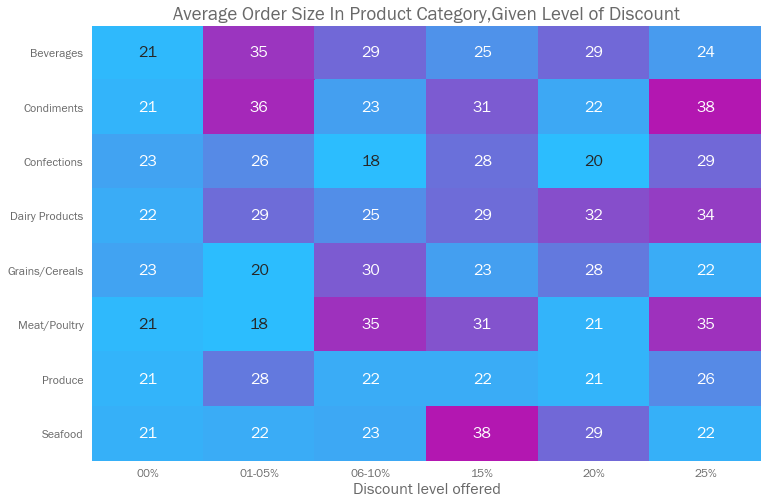

In [52]:
#Plot the data as a heatmap
discount_heatmap = df_orderdet.groupby(['ProductCategory','DiscountCat']).mean()['Quantity'].unstack(level=1)

plt.figure(figsize = (12,8))
sns.heatmap(discount_heatmap, cmap=CB91_Grad_BP, annot=True, cbar=False, vmin = 20);
plt.title('Average Order Size In Product Category,Given Level of Discount');
plt.xlabel('Discount level offered');
plt.ylabel('');
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

So it seems like order sizes are larger when at least some discount is given (the LHS column is very very blue). However, the relationship between the amount of discount and the order size is far from obvious, and differs from product category to category.

We will use Monte Carlo simulations to determine whether this difference is significant.

Firstly, define a function that, given a product category, can generate two samples from the dataset:
* Sample 1 (order size with certain level of discount)
* Sample 2 (order size with no / lower level of discount)

In [53]:
def discount_samples(prod_cat, discount, comp_discounts):
    
    '''
    Takes a specific product category and discount level.
    
    'comp_discount' specifies the discount levels to be used in the compliment sample.
    
    Outputs two samples:
    
    sample 1:
        The order size datapoints for the given product category with specified level of discount
        
    sample 2:
        The order size datapoints for the given product category with the comp_discount levels of discount
    '''

    #Create sample for the discount level specified
    discount_sample = np.array(
        df_orderdet.loc[(df_orderdet['ProductCategory']==prod_cat) &
                                               (df_orderdet['DiscountCat']==discount)]['Quantity'])
    
    #And the compliment sample for lower discount levels
    compliment_sample = np.array(
        df_orderdet.loc[(df_orderdet['ProductCategory']==prod_cat) &
                                               (df_orderdet['DiscountCat'].isin(comp_discounts))]['Quantity'])
    
    return discount_sample, compliment_sample

Now we write a function that takes a category and tests levels of discount, from low to high, with monte carlo simulations. It should suggest whether or not there is value in increasing discount levels when selling certain categories of products.

We'll then make a second formula that loops through all the different categories of products.

In [54]:
def single_cat_discount_test(prod_cat, n = 10000, alpha = 0.05):
    
        
    '''
    Outputs a pandas dataframe, listing hypothesis tests for the effect on order numbers,
    associated with discount levels, of a given product category.
    
    It does this sequentially, i.e. it starts by comparing the lowest discount level to
    no discount level, then moves through the discount levels until it finds a statistically
    signficant increase in orders.
    
    When it does so, it compares higher discount levels against all discount levels between
    itself and the last level that produced a significant uplift in sales.
    
    Parameters:
    * prod_cat:
        The product category to investigate
    
    * n:
        The number of simulations to run for each monte carlo test
   
    * alpha:
        The alpha level to determine statistical significance

    '''
    
    
    #declare the different possible discount values
    discounts = list(df_orderdet.groupby('DiscountCat').count().index)
    
    #initiate lists that we will populate to build the dataframe later
    category_column = []
    discount_column = []
    comparison_column = []
    p_value_column = []
    reject_column = []
    
    columns = ['Product Category','Discount Level','Levels Tested Against','P-Value','Reject']
    
    #we declare discount_floor, which keeps track of the lowest discount level that we
    #include in the compliment sample. This starts at 0%
    discount_floor = '00%'
    
    #cycle through the discount levels, and look for statistical significance
    for i in discounts[1:]:
        category_column.append(prod_cat)
        discount_column.append(i)
        
        #create list of discount levels for the compliment sample
        #this includes the floor, and goes up to (but not including) the current level
        comp_discounts = discounts[discounts.index(discount_floor):discounts.index(i)]
        
        #add these to the comparison column
        comparison_column.append(comp_discounts)
        
        #generate samples for the given discount level, and run monte carlo        
        a,b = discount_samples(prod_cat, discount = i, comp_discounts = comp_discounts)
        
        p_value = monte_carlo(a, b, n=n)
        p_value_column.append(p_value)
        
        rejection = reject_null(p_value,alpha = alpha)
        reject_column.append(rejection)
        
        #if null rejected, the current i becomes the new floor 
        if rejection == 'Reject Null Hypothesis':
            discount_floor = i

    #create the new dataframe        
    df = pd.DataFrame({'Product Category':category_column,
                       'Discount Level':discount_column,
                       'Levels Tested Against':comparison_column,
                       'P-Value':p_value_column,
                       'Reject':reject_column},
                      columns=columns)
    
    return df




def discount_hypo_test(categories = list(df_orderdet['ProductCategory'].unique()),
                       n = 10000, alpha = 0.05):
    '''
    Outputs a pandas dataframe, listing hypothesis tests for the effect on order numbers,
    associated with discount levels, of a given list of product categories.
    
    It does this sequentially, i.e. it starts by comparing the lowest discount level to
    no discount level, then moves through the discount levels until it finds a statistically
    signficant increase in orders.
    
    When it does so, it compares higher discount levels against all discount levels between
    itself and the last level that produced a significant uplift in sales.
    
    Parameters:
    * categories:
        The product categories to investigate. Will check all categories by default
    
    * n:
        The number of simulations to run for each monte carlo test
   
    * alpha:
        The alpha level to determine statistical significance

    '''
    
    #declare an empty pandas dataframe to populate
    columns = ['Product Category','Discount Level','Levels Tested Against','P-Value','Reject']
    df = pd.DataFrame(columns = columns)
    
    
    #run the monte carlo functions as defined in the single_cat_discount_test function
    for prod in categories:
        new_df = single_cat_discount_test(prod_cat = prod, n = n, alpha = alpha)
        df = pd.concat([df,new_df])
    
    df.reset_index(inplace = True)
    df.drop('index', inplace = True, axis = 1)
    return df

In [55]:
#discount_hypo_tests = discount_hypo_test(n = 50000)
#Save the dataframe to CSV so that we don't have to run that again...
#discount_hypo_tests.to_csv('discount_hypo_tests.csv')

In [56]:
discount_hypo_tests = pd.read_csv('discount_hypo_tests.csv').drop('Unnamed: 0', axis = 1)

In [57]:
discount_hypo_tests.loc[discount_hypo_tests['Reject'] == 'Reject Null Hypothesis']

,Product Category,Discount Level,Levels Tested Against,P-Value,Reject
0,Dairy Products,01-05%,['00%'],0.01778,Reject Null Hypothesis
17,Seafood,15%,"['00%', '01-05%', '06-10%']",0.00104,Reject Null Hypothesis
20,Condiments,01-05%,['00%'],0.00098,Reject Null Hypothesis
29,Confections,25%,"['00%', '01-05%', '06-10%', '15%', '20%']",0.04660,Reject Null Hypothesis
30,Beverages,01-05%,['00%'],0.00078,Reject Null Hypothesis
36,Meat/Poultry,06-10%,"['00%', '01-05%']",0.00722,Reject Null Hypothesis


## Hypothesis 3

This hypothesis will see whether or not customers who order less frequently make bigger orders on average. If they do, then this will inform Northwind to not bother pursuing customers to order more frequently.

Start by making a 'days between orders' column, which works out the average length of time between a customers' orders.

In [58]:
DaysBetweenOrders = []

for i in range(len(df_cust)):
    cust = df_cust.iloc[i]
    
    if cust['Orders'] > 1:
        dbo = round(float((cust['LastOrder'] - cust['FirstOrder']).days / cust['Orders']),1)
        
    else:
        dbo = None
    
    DaysBetweenOrders.append(dbo)
    
df_cust['DaysBetweenOrders'] = DaysBetweenOrders
np.mean(df_cust['DaysBetweenOrders'])

66.01363636363634

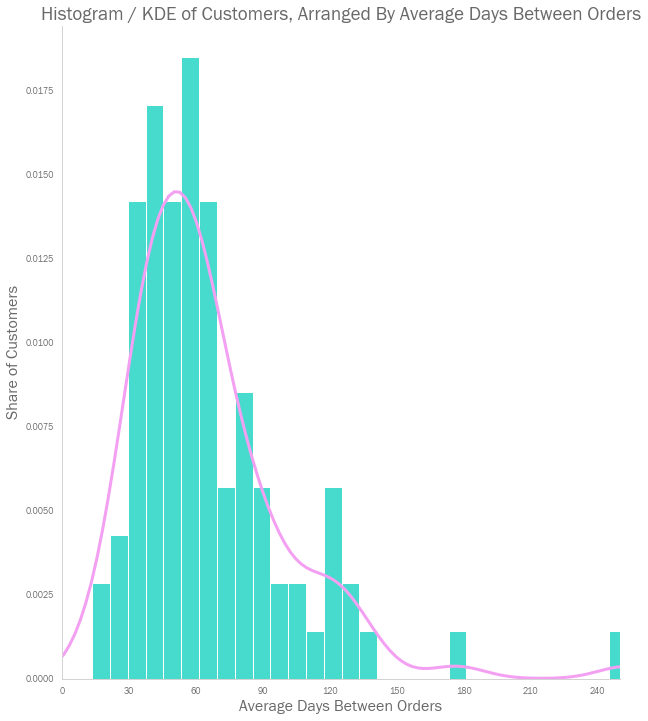

In [59]:
#let's visualise this new KPI

plt.figure(figsize = (10,12))

sns.distplot([i for i in DaysBetweenOrders if type(i) == float], bins = 30,
            kde_kws={"color": CB91_Pink, "lw": 3},
            hist_kws={"linewidth": 1, "color": CB91_Green, "alpha": 1});

plt.title('Histogram / KDE of Customers, Arranged By Average Days Between Orders');
plt.xlabel('Average Days Between Orders');
plt.ylabel('Share of Customers');
plt.xticks(np.arange(0,250,30));
plt.xlim(0,250);

How does order frequency compare to order sizes?

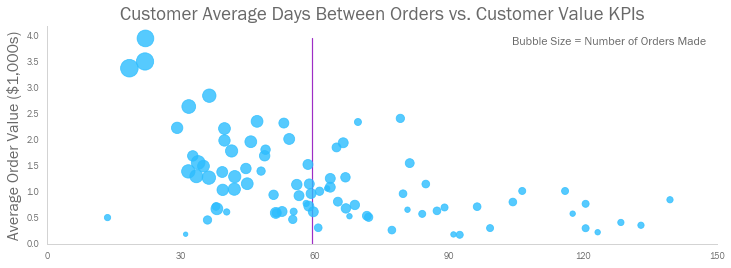

In [60]:
plt.figure(figsize = (12,4))

X = list(df_cust['DaysBetweenOrders'])
Y = list(df_cust['AvgOrder']/1000)
S = list(df_cust['Orders']*10)

plt.scatter(X,Y,s=S,alpha=0.8,c = CB91_Blue,zorder = 2);
plt.plot([2*356/12,2*356/12],[0,max(Y)],color = CB91_Purple,zorder = 1)

plt.title('Customer Average Days Between Orders vs. Customer Value KPIs');

# plt.title('Customer Average Days Between Orders vs. Average Order Value');
# plt.xlabel('Average Days Between Orders');
plt.ylabel('Average Order Value ($1,000s)');
plt.xticks(np.arange(0,250,30));
plt.xlim(0,150);
plt.ylim(0,);

custom_lines = [Line2D([0], [0], marker='o', c='w', markerfacecolor=CB91_Blue, markersize=0)]
    
plt.legend(custom_lines,
           ['Bubble Size = Number of Orders Made'],
           loc = 1,
           fontsize = 12,
          frameon = False);

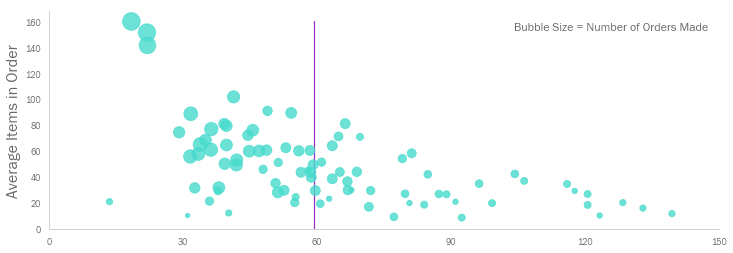

In [61]:
plt.figure(figsize = (12,4))

X = list(df_cust['DaysBetweenOrders'])
Y = list(df_cust['AvgItems'])
S = list(df_cust['Orders']*10)

plt.scatter(X,Y,s=S,alpha=0.8,c = CB91_Green,zorder = 2);
plt.plot([2*356/12,2*356/12],[0,max(Y)],color = CB91_Purple,zorder = 1)

# plt.title('Customer Average Days Between Orders vs. Average Items in Order');
# plt.xlabel('Average Days Between Orders');
plt.ylabel('Average Items in Order');
plt.xticks(np.arange(0,250,30));
plt.xlim(0,150);
plt.ylim(0,);

custom_lines = [Line2D([0], [0], marker='o', c='w', markerfacecolor=CB91_Blue, markersize=0)]
    
plt.legend(custom_lines,
           ['Bubble Size = Number of Orders Made'],
           loc = 1,
           fontsize = 12,
          frameon = False);

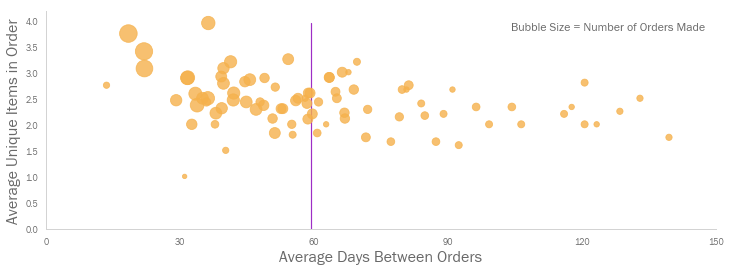

In [62]:
plt.figure(figsize = (12,4))

X = list(df_cust['DaysBetweenOrders'])
Y = list(df_cust['AvgUniqueItems'])
S = list(df_cust['Orders']*10)

plt.scatter(X,Y,s=S,alpha=0.8,c = CB91_Amber,zorder = 2);
plt.plot([2*356/12,2*356/12],[0,max(Y)],color = CB91_Purple,zorder = 1)

# plt.title('Customer Average Days Between Orders vs. Average Unique Items in Order Value');
plt.xlabel('Average Days Between Orders');
plt.ylabel('Average Unique Items in Order');
plt.xticks(np.arange(0,250,30));
plt.xlim(0,150);
plt.ylim(0,);

custom_lines = [Line2D([0], [0], marker='o', c='w', markerfacecolor=CB91_Blue, markersize=0)]
    
plt.legend(custom_lines,
           ['Bubble Size = Number of Orders Made'],
           loc = 1,
           fontsize = 12,
          frameon = False);

We create a function that splits the customers into two groups, depending on the average duration between orders.

In [63]:
def split_cust_by_dbo(dbo = 30, kpi = 'AvgOrder'):
    
    '''
    Function takes 'dbo', the average days between orders that we want to use as a threshold,
    and the kpi that we want to analyse.
    
    It returns two numpy arrays:
    sampleA: An array of kpi values for customers with average order gap less than or equal to dbo
    sampleB: An array of kpi values for customers with average order gap greater than dbo
    
    '''
    
    sampleA = np.array(df_cust.loc[df_cust['DaysBetweenOrders'] <= dbo][kpi])
    sampleB = np.array(df_cust.loc[df_cust['DaysBetweenOrders'] > dbo][kpi])
    
    return sampleA, sampleB

Let's use two months as the threshold - do customers ordering more than every two months on average make bigger orders? What about other KPIs?

In [64]:
A,B = split_cust_by_dbo(dbo = (2 * 365/12), kpi = 'AvgOrder')
C,D = split_cust_by_dbo(dbo = (2 * 365/12), kpi = 'AvgItems')
E,F = split_cust_by_dbo(dbo = (2 * 365/12), kpi = 'AvgUniqueItems')

In [65]:
mc_runs = [10,20,30,40,50,100,200,300,400,500,1000,2000,3000,4000,5000,
           10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,
           110000,120000,130000,140000,150000,200000]

Run Monte Carlo simulations, using the above number of simulations so that we can see how the p-value tends to a limit.

(Note - commented out for now, so that it does not run with every notebook refresh. Values are stored in a CSV, which is loaded in the following cell).

In [66]:
# Yab = []

# for i in mc_runs:
#     Yab.append(monte_carlo(A,B,n=i))


# Ycd = []

# for i in mc_runs:
#     Ycd.append(monte_carlo(C,D,n=i))


# Yef = []

# for i in mc_runs:
#     Yef.append(monte_carlo(E,F,n=i))


# Hypothesis3 = pd.DataFrame({'Simulations':mc_runs,
#              'AvgOrderValue p-values':Yab,
#              'AvgItems p-values':Ycd,
#              'AvgUniqueItems p-values':Yef}).set_index('Simulations')

# Hypothesis3.to_csv('Hypothesis3pvals.csv')

In [67]:
Hypothesis3 = pd.read_csv('Hypothesis3pvals.csv')

Yab = list(Hypothesis3['AvgOrderValue p-values'])
Ycd = list(Hypothesis3['AvgItems p-values'])
Yef = list(Hypothesis3['AvgUniqueItems p-values'])

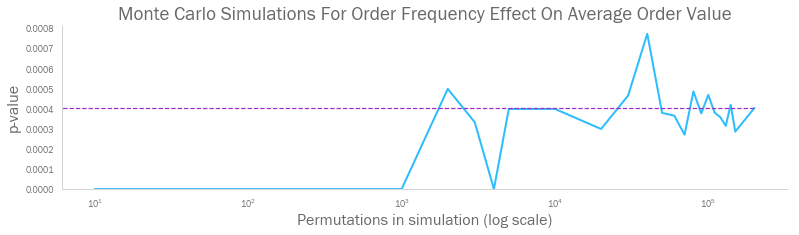

In [68]:
plt.figure(figsize = (13,3))
plt.plot(mc_runs,Yab,lw=2);
plt.plot([0,200000],[Yab[-1],Yab[-1]],color = CB91_Purple, ls = '--')

plt.xscale('log')
plt.title('Monte Carlo Simulations For Order Frequency Effect On Average Order Value');
plt.xlabel('Permutations in simulation (log scale)');
plt.ylabel('p-value');
plt.ylim(0,);

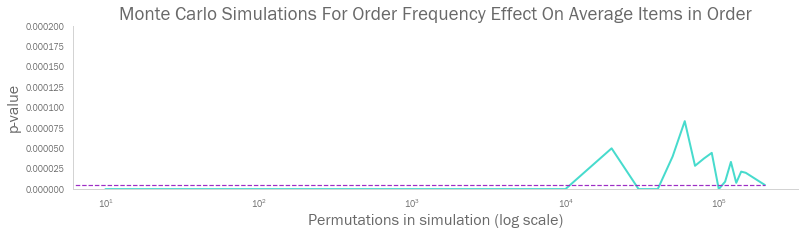

In [69]:
plt.figure(figsize = (13,3))
plt.plot(mc_runs,Ycd,lw=2, color = CB91_Green);
plt.plot([0,200000],[Ycd[-1],Ycd[-1]],color = CB91_Purple, ls = '--')

plt.xscale('log')
plt.title('Monte Carlo Simulations For Order Frequency Effect On Average Items in Order');
plt.xlabel('Permutations in simulation (log scale)');
plt.ylabel('p-value');
plt.ylim(0,0.0002);

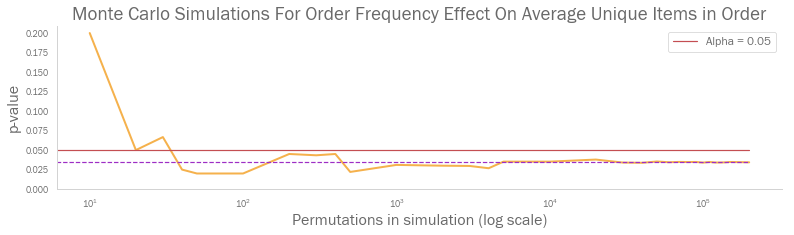

In [70]:
plt.figure(figsize = (13,3))
plt.plot(mc_runs,Yef,lw=2, color = CB91_Amber);
plt.plot([0,200000],[Yef[-1],Yef[-1]],color = CB91_Purple, ls = '--')
plt.plot([0,200000],[0.05,0.05],color = 'r', label = 'Alpha = 0.05')


plt.xscale('log')
plt.title('Monte Carlo Simulations For Order Frequency Effect On Average Unique Items in Order');
plt.xlabel('Permutations in simulation (log scale)');
plt.ylabel('p-value');
plt.ylim(0,);

plt.legend(fontsize = 12);

So we can see that all three differences are statistically significant:

Customers making more than one order every 2 months, on average:

* Make more valuable orders
* Purchase more units per order
* Include more unique types of product in each order


## Hypothesis 4

This set of hypotheses will consider the relative cost of the four different shipping companies. We will try to see if any of them are relatively more expensive, accounting for what they are transporting.

If one company seems more expensive, we can recommend moving Northwind's custom away from them.

In [71]:
df_shipping = df_order[['ShipVia','Freight','ShipCountry','ShipRegion','OrderValue','ItemsInOrder']]
df_shipping['FreightMargin'] = df_shipping['Freight'] / df_shipping['OrderValue']
df_shipping['FreightCostPerItem'] = df_shipping['Freight'] / df_shipping['ItemsInOrder']

df_shipping.head()

/Users/Callum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Callum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ShipVia,Freight,ShipCountry,ShipRegion,OrderValue,ItemsInOrder,FreightMargin,FreightCostPerItem
0,3,32.38,France,West Central Europe,440.00,27,0.073591,1.199259
1,1,11.61,Germany,West Central Europe,1863.40,49,0.006231,0.236939
2,2,65.83,Brazil,Latin America,1552.60,60,0.042400,1.097167
3,1,41.34,France,West Central Europe,654.06,41,0.063205,1.008293
4,2,51.30,Belgium,West Central Europe,3597.90,105,0.014258,0.488571


A cursory glance at the data suggests that shipping company 1 (Speedy Express) is the cheapest freight company, both relative to the size of the order, and the total number of items in the order.

In [72]:
df_shipping.groupby(['ShipVia']).mean()[['FreightMargin','FreightCostPerItem']]

,FreightMargin,FreightCostPerItem
ShipVia,,
1,0.050058,1.097552
2,0.051250,1.301375
3,0.052549,1.301451


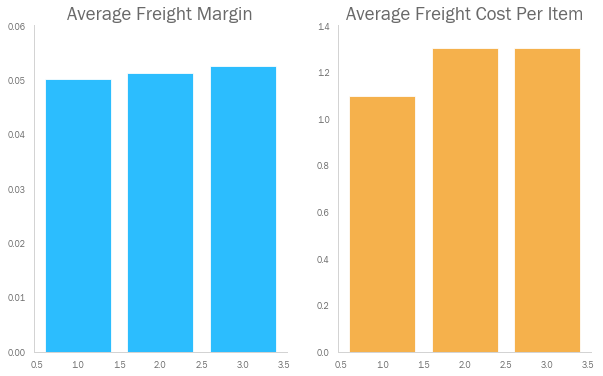

In [73]:
X = df_shipping.groupby(['ShipVia']).mean().index
Y1 = df_shipping.groupby(['ShipVia']).mean()['FreightMargin']
Y2 = df_shipping.groupby(['ShipVia']).mean()['FreightCostPerItem']

new_figure = plt.figure(figsize=(10,6))

ax1 = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

ax1.bar(X, Y1), ax2.bar(X, Y2, color=CB91_Amber);

ax1.set_ylim(0, 0.06), ax2.set_ylim(0,1.4);

ax1.set_title('Average Freight Margin');
ax2.set_title('Average Freight Cost Per Item');

Breaking these out by region does show some regional differences.

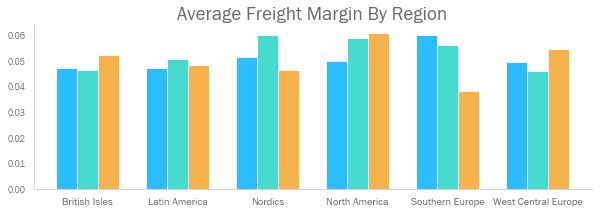

In [74]:
ship_by_region = df_shipping.groupby(['ShipRegion','ShipVia']).mean()[['FreightMargin','FreightCostPerItem']]

fig = ship_by_region['FreightMargin'].unstack().plot(kind='bar',figsize=(10,3), width = 0.7);
fig.set_title('Average Freight Margin By Region');
fig.set_xlabel('');
fig.get_legend().remove()
plt.xticks(rotation='horizontal', fontsize = 10.5);

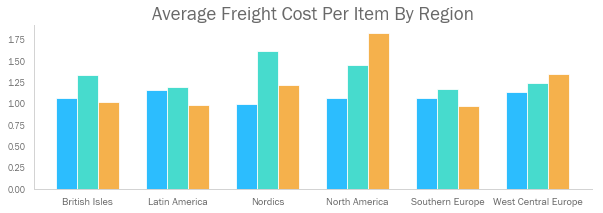

In [75]:
fig = ship_by_region['FreightCostPerItem'].unstack().plot(kind='bar',figsize=(10,3), width = 0.7);
fig.set_title('Average Freight Cost Per Item By Region');
fig.set_xlabel('');
fig.get_legend().remove()
plt.xticks(rotation='horizontal', fontsize = 10.5);

We want to run a hypothesis test on each company, in each region. This will help us to decide how we should modify the company's shipping strategy on a region by region basis.

In particular, we should take each company's value for each region in turn, and test it relative to the values of the other two shipping companies (and make the test dynamic depending on whether they're above or below the average).

We create some helper functions, which we will then combine into a single function for mass automated monte carlo hypothesis testing.

In [76]:
def freight_samples(company,region,kpi):
    
    '''
    Takes shipping company, region, and cost KPI.
    Outputs two samples:
    
    sample 1:
        The KPI datapoints for the given company in the given region
        
    sample 2:
        The equivalent sample for the other two companies
    '''
    
    company_sample = np.array(df_shipping.loc[(df_shipping['ShipVia'] == company)
                        & (df_shipping['ShipRegion'] == region)][kpi])
    
    compliment_sample = np.array(df_shipping.loc[(df_shipping['ShipVia'] != company)
                        & (df_shipping['ShipRegion'] == region)][kpi])
    
    return company_sample, compliment_sample



def freight_avg_comparison(company,region,kpi):
    
    '''
    Takes shipping company, region, and cost KPI.
    Outputs whether the company is greater or less than average for that KPI in that region.
    '''
    
    #Calculate the means for each company
    company1_mean = np.mean(df_shipping.loc[(df_shipping['ShipVia'] == 1)
                        & (df_shipping['ShipRegion'] == region)][kpi])
    
    company2_mean = np.mean(df_shipping.loc[(df_shipping['ShipVia'] == 2)
                        & (df_shipping['ShipRegion'] == region)][kpi])
    
    company3_mean = np.mean(df_shipping.loc[(df_shipping['ShipVia'] == 3)
                        & (df_shipping['ShipRegion'] == region)][kpi])
    
    company_means = [company1_mean, company2_mean, company3_mean]
    
    
    #Work out the market mean of company performance
    overall_mean = np.mean(company_means)
    
    #Work out whether or not company is above or below average
    if overall_mean < company_means[company-1]:
        return 'greater'
    else:
        return 'less'
    
    
    
def freight_hypo_gen(company,region,kpi):

    '''
    Takes shipping company, region, and cost KPI.
    Outputs a tuple of strings describing null and alternate hypotheses.
    '''
    
    comparitor = freight_avg_comparison(company,region,kpi)
    
    H0 = f"Company {company}'s {kpi} in {region} = other shipping companies"
    Ha = f"Company {company}'s {kpi} in {region} is {comparitor} than other shipping companies"
    
    return (H0,Ha)

We will create a function that outputs a dataframe, storing hypothesis tests for different freight companies.

The columns will be:
* The company in question
* The region we're considering
* The KPI we're considering
* The null hypothesis
* The alternative hypothesis
* The p-value
* The rejection status

In [77]:
def freight_hypo_test(n = 10000, alpha = 0.5,
                      regions = list(df_shipping['ShipRegion'].unique()),
                      kpis = ['FreightMargin','FreightCostPerItem'],
                      reject_only = False):
    
    '''
    Outputs a pandas dataframe, listing all possible hypothesis tests for
    the cost of shipping companies across different regions.
    
    Parameters:
    * n:
        The number of monte carlo simulations that should be done in each test
    
    * alpha:
        The alpha that should be used to reject the null hypothesis
   
    * regions:
        The list of regions that should be tested (tests all by default)
    
    * kpis:
        The shipping cost KPIs that should be tested (tests both by default)
    
    * reject_only:
        Choose whether or not to only show the cases where the null hypothesis is rejected
    '''
    
    #Define columns for the dataframe
    columns = ['Company','Region','KPI','Comparison to Others',
               'Null Hypothesis','Alternative Hypothesis','P-Value','Reject']
    
    companies = [1,2,3]
    
    #Create a list of all the combinations of the companies, regions, and KPIs in play
    freight_test_combs = list(itertools.product(companies,regions,kpis))
    
    #Define the first three columns...
    company_column = [i[0] for i in freight_test_combs]
    region_column = [i[1] for i in freight_test_combs]
    kpi_column = [i[2] for i in freight_test_combs]
    
    
    #Define the average comparison that we're making
    comparison_column = [freight_avg_comparison(i[0],i[1],i[2]).title() for i in freight_test_combs]
    
    
    #Create the null and alternative hypothesis columns
    freight_hyps = []

    for i in freight_test_combs:
        freight_hyps.append(freight_hypo_gen(i[0],i[1],i[2]))

    null_hyps_column = [i[0] for i in freight_hyps]
    alt_hyps_column = [i[1] for i in freight_hyps]
    
    
    #Create the p_values column. First initiate an empty list...
    p_values_column = []
    
    #Then, for each combination, create appropriate samples from dataframe...
    for i in freight_test_combs:
        a,b = freight_samples(i[0],i[1],i[2])
        
        #And run a monte carlo simulation for each combination
        p_value = monte_carlo(a, b, n=n, A_x_than_B=freight_avg_comparison(i[0],i[1],i[2]))
        p_values_column.append(p_value)
    
    #Create the reject column directly from the p_values column
    reject_column = [reject_null(i) for i in p_values_column]
    
    
    #Create the dataframe!
    dataframe = pd.DataFrame(data = {'Company':company_column,
                                     'Region':region_column,
                                     'KPI':kpi_column,
                                     'Comparison to Others':comparison_column,
                                     'Null Hypothesis':null_hyps_column,
                                     'Alternative Hypothesis':alt_hyps_column,
                                     'P-Value':p_values_column,
                                     'Reject':reject_column}, columns = columns)
    
    if reject_only == True:
        dataframe = dataframe.loc[dataframe['Reject'] == 'Reject Null Hypothesis']
    
    return dataframe

We can run use the above function to create a table of all the hypothesis tests.

In [78]:
#freight_hypo_tests = freight_hypo_test(n = 50000)

#Save the dataframe to CSV so that we don't have to run that again...
#freight_hypo_tests.to_csv('freight_hypo_tests.csv')

In [79]:
freight_hypo_tests = pd.read_csv('freight_hypo_tests.csv').drop('Unnamed: 0', axis = 1)
freight_hypo_tests.loc[freight_hypo_tests['Reject'] == 'Reject Null Hypothesis']

,Company,Region,KPI,Comparison to Others,Null Hypothesis,Alternative Hypothesis,P-Value,Reject
5,1,North America,FreightCostPerItem,Less,Company 1's FreightCostPerItem in North Americ...,Company 1's FreightCostPerItem in North Americ...,0.04936,Reject Null Hypothesis
7,1,Nordics,FreightCostPerItem,Less,Company 1's FreightCostPerItem in Nordics = ot...,Company 1's FreightCostPerItem in Nordics is l...,0.04330,Reject Null Hypothesis
8,1,Southern Europe,FreightMargin,Greater,Company 1's FreightMargin in Southern Europe =...,Company 1's FreightMargin in Southern Europe i...,0.04454,Reject Null Hypothesis
12,2,West Central Europe,FreightMargin,Less,Company 2's FreightMargin in West Central Euro...,Company 2's FreightMargin in West Central Euro...,0.04186,Reject Null Hypothesis
19,2,Nordics,FreightCostPerItem,Greater,Company 2's FreightCostPerItem in Nordics = ot...,Company 2's FreightCostPerItem in Nordics is g...,0.02202,Reject Null Hypothesis
24,3,West Central Europe,FreightMargin,Greater,Company 3's FreightMargin in West Central Euro...,Company 3's FreightMargin in West Central Euro...,0.02996,Reject Null Hypothesis
32,3,Southern Europe,FreightMargin,Less,Company 3's FreightMargin in Southern Europe =...,Company 3's FreightMargin in Southern Europe i...,0.00364,Reject Null Hypothesis
